Statistical Analysis and Predictive Modeling of Bank Marketing Campaign Outcomes

Methodology:

Data loading & cleaning

Removing duplicates and outliers

EDA

Hypothesis testing (Z-test & T-test)

Building predictive models (classification)

In [26]:
# Importing Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix


In [27]:
# Load Dataset
df = pd.read_csv(r'D:\python_projects\Bank Marketing Campaign Data\data\Bank_marketing_campaign_dataset.csv')

# Quick Look at Data
print(df.shape)
print(df.head())
print(df.info())
print(df.describe())


(45211, 11)
             occupation  age education_level marital_status  \
0  administrative_staff   28     high_school        married   
1  administrative_staff   58    unidentified        married   
2               jobless   40     high_school       divorced   
3        retired_worker   63     high_school        married   
4        business_owner   43         college        married   

  communication_channel call_month  call_day  call_duration  call_frequency  \
0          unidentified  September         9              1               1   
1          unidentified       June         5            307               2   
2                mobile   February         4            113               1   
3                mobile      April         7             72               5   
4              landline       July        29            184               4   

  previous_campaign_outcome conversion_status  
0                successful     not_converted  
1              unidentified     not_co

In [28]:
# Removed duplicate rows
df = df.drop_duplicates()
print(f"Data shape after removing duplicates: {df.shape}")


Data shape after removing duplicates: (45205, 11)


In [29]:
# Check missing values
print(df.isnull().sum())

# Example: Fill missing numerical values with mean, categorical with mode
for column in df.columns:
    if df[column].dtype == 'object':
        df[column].fillna(df[column].mode()[0], inplace=True)
    else:
        df[column].fillna(df[column].mean(), inplace=True)


occupation                   0
age                          0
education_level              0
marital_status               0
communication_channel        0
call_month                   0
call_day                     0
call_duration                0
call_frequency               0
previous_campaign_outcome    0
conversion_status            0
dtype: int64


In [30]:
# Remove outliers from numeric columns
numeric_cols = df.select_dtypes(include=[np.number]).columns

for col in numeric_cols:
    z_scores = np.abs(stats.zscore(df[col]))
    df = df[(z_scores < 3)]
    
print(f"Data shape after removing outliers: {df.shape}")


Data shape after removing outliers: (43041, 11)


#Exploratory Data Analysis (EDA)

In [31]:
print(df.columns.tolist())


['occupation', 'age', 'education_level', 'marital_status', 'communication_channel', 'call_month', 'call_day', 'call_duration', 'call_frequency', 'previous_campaign_outcome', 'conversion_status']


In [32]:
df.columns = df.columns.str.strip()  # Remove any extra spaces


In [33]:
# Clean column names
df.columns = df.columns.str.strip().str.lower()  # lowercase and remove extra spaces
print(df.columns.tolist())  # Check cleaned column names


['occupation', 'age', 'education_level', 'marital_status', 'communication_channel', 'call_month', 'call_day', 'call_duration', 'call_frequency', 'previous_campaign_outcome', 'conversion_status']


<Axes: title={'center': 'Target Distribution'}, xlabel='conversion_status'>

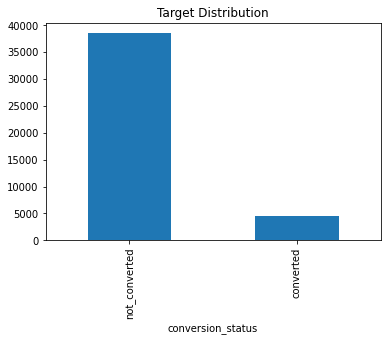

In [34]:
df['conversion_status'].value_counts().plot(kind='bar', title='Target Distribution')




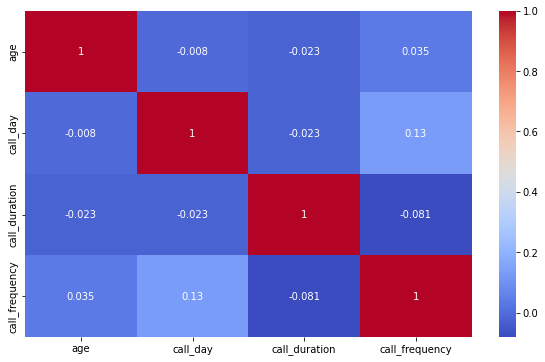

In [35]:
# Correlation heatmap (only numeric columns)
plt.figure(figsize=(10, 6))
sns.heatmap(df.select_dtypes(include=[np.number]).corr(), annot=True, cmap='coolwarm')
plt.show()


c:\Users\yeswa\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


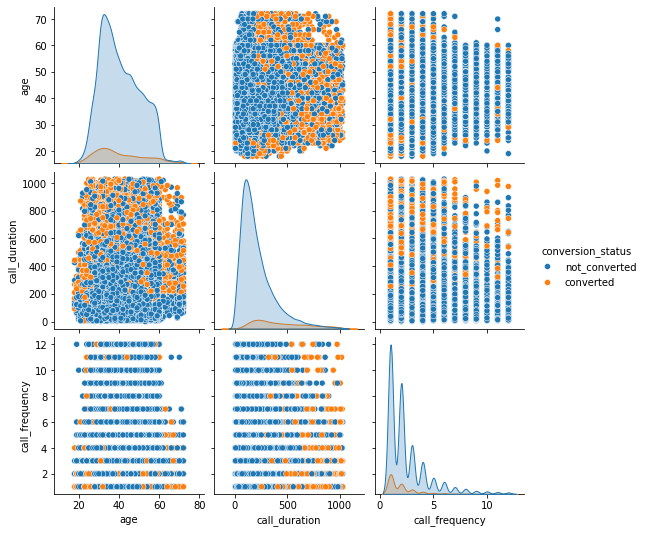

In [36]:
# Pairplot
sns.pairplot(df[['age', 'call_duration', 'call_frequency', 'conversion_status']], hue='conversion_status')
plt.show()

# Hypothesis Testing

# Z-Test: call_duration impact on conversion

In [37]:

converted = df[df['conversion_status'] == 'converted']['call_duration']
not_converted = df[df['conversion_status'] == 'not_converted']['call_duration']

z_stat, p_val = stats.ttest_ind(converted, not_converted)
print(f"Z-Test Results - z-stat: {z_stat}, p-value: {p_val}")


Z-Test Results - z-stat: 80.71138753286185, p-value: 0.0


# T-Test: age impact on conversion

In [38]:
converted_age = df[df['conversion_status'] == 'converted']['age']
not_converted_age = df[df['conversion_status'] == 'not_converted']['age']

t_stat, p_val = stats.ttest_ind(converted_age, not_converted_age)
print(f"T-Test Results - t-stat: {t_stat}, p-value: {p_val}")

T-Test Results - t-stat: -0.9513563235560033, p-value: 0.34142886647174286


#  Predictive Modeling

In [39]:

# Encode categorical columns
le = LabelEncoder()
for col in df.select_dtypes(include='object').columns:
    df[col] = le.fit_transform(df[col])

# Features and Target
X = df.drop('conversion_status', axis=1)
y = df['conversion_status']

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train Model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)




RandomForestClassifier(random_state=42)

Accuracy: 91.31%
              precision    recall  f1-score   support

           0       0.64      0.37      0.47       893
           1       0.93      0.98      0.95      7716

    accuracy                           0.91      8609
   macro avg       0.79      0.67      0.71      8609
weighted avg       0.90      0.91      0.90      8609



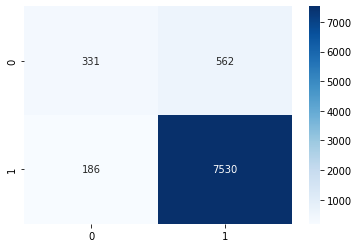

In [40]:
# ✅ Step 7: Evaluation
y_pred = model.predict(X_test)

print(f"Accuracy: {accuracy_score(y_test, y_pred) * 100:.2f}%")
print(classification_report(y_test, y_pred))

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.show()

Read me file 

"Statistical Analysis and Predictive Modeling of Bank Marketing Campaign Outcomes"

This project analyzes and predicts customer conversion outcomes in a bank marketing campaign using statistical tests and machine learning models (Classification).

# Project Objectives

Perform Exploratory Data Analysis (EDA) to understand customer behavior.

Conduct Hypothesis Testing (Z-Test, T-Test) to find significant factors impacting campaign success.

Build a Predictive Model to forecast customer conversion with high accuracy.